In [4]:
import pandas as pd
import numpy as np
import nltk 
nltk.download('punkt')
!pip install tensorflow
import tensorflow

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nidhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("output_file.csv")

# Example row processing function
def process_row(row):
    patient_data = {}

    # Define features as sentences (you can add more columns based on your need)
    patient_data['Murmur'] = f"Murmur: {row['Murmur']}"
    patient_data['Murmur Location'] = f"Murmur Locations: {row['Murmur locations']}"
    patient_data['Most Audible Location'] = f"Most Audible Location: {row['Most audible location']}"
    patient_data['Outcome'] = f"Outcome: {row['Outcome']}"
    patient_data['Campaign'] = f"Campaign: {row['Campaign']}"

    return patient_data

# Apply to each row
processed_data = df.apply(process_row, axis=1)

# Example output for the first patient
print(processed_data[0])


{'Murmur': 'Murmur: Present', 'Murmur Location': 'Murmur Locations: TV', 'Most Audible Location': 'Most Audible Location: TV', 'Outcome': 'Outcome: Abnormal', 'Campaign': 'Campaign: CC2015'}


In [8]:
import numpy as np
from nltk.tokenize import word_tokenize

# Example GloVe embedding dictionary (you'll want to load the actual embeddings)
glove_embeddings = {'Murmur': np.array([0.1, 0.2, 0.3]), 'Present': np.array([0.4, 0.5, 0.6])}  # Just an example

# Ensure the word embeddings have a consistent shape (e.g., 3-dimensional vectors)
embedding_dim = 3  # For demonstration; use 50, 100, 300 for GloVe embeddings.

# Tokenize and embed a sentence
def get_sentence_embedding(sentence):
    words = word_tokenize(sentence)
    
    # Ensure each word is converted to a consistent-sized embedding
    word_embeddings = []
    for word in words:
        embedding = glove_embeddings.get(word, np.zeros(embedding_dim))  # Default to zeros if word not found
        word_embeddings.append(embedding)
    
    # If there are no word embeddings (e.g., the sentence was empty), return a zero vector
    if not word_embeddings:
        return np.zeros(embedding_dim)
    
    # Compute the average of the word embeddings in the sentence
    sentence_embedding = np.mean(word_embeddings, axis=0)  # Average embedding
    return sentence_embedding

# Example processed sentence (e.g., "Murmur: Present.")
sentence = "Murmur: Present."

# Get the embedding for the sentence
sentence_embedding = get_sentence_embedding(sentence)
print(sentence_embedding)


[0.125 0.175 0.225]


In [10]:
# Example sentence embedding
print(sentence_embedding)  # Output: array([0.25, 0.35, 0.45])


[0.125 0.175 0.225]


In [12]:
print(df.columns)


Index(['Patient ID', 'Age', 'Sex', 'Height', 'Weight', 'Pregnancy status',
       'Murmur', 'Murmur locations', 'Most audible location',
       'Systolic murmur timing', 'Systolic murmur shape',
       'Systolic murmur grading', 'Systolic murmur pitch',
       'Systolic murmur quality', 'Diastolic murmur timing',
       'Diastolic murmur shape', 'Diastolic murmur grading',
       'Diastolic murmur pitch', 'Diastolic murmur quality', 'Outcome',
       'Campaign', 'Additional ID', 'AV Sound Type', 'AV Murmur Timings',
       'PV Sound Type', 'PV Murmur Timings', 'TV Sound Type',
       'TV Murmur Timings', 'MV Sound Type', 'MV Murmur Timings'],
      dtype='object')


In [14]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize

# Step 1: Load the CSV file
df = pd.read_csv("output_file.csv")  # Adjust the path to your actual CSV file

# Example GloVe embedding dictionary (you'll want to load the actual embeddings)
glove_embeddings = {'Murmur': np.array([0.1, 0.2, 0.3]), 'Present': np.array([0.4, 0.5, 0.6])}  # Just an example

# Set the embedding dimensions
embedding_dim = 3  # For demonstration, use the actual GloVe embedding size in practice (e.g., 50, 100, 300)

# Step 2: Process each row (each patient)
def process_row(row):
    patient_data = []
    patient_data.append(f"Murmur Location: {row['Murmur locations']}")
    patient_data.append(f"Most Audible Location: {row['Most audible location']}")

    # Create sentences for each patient from relevant columns
    patient_data.append(f"Murmur: {row['Murmur']}")
    patient_data.append(f"Systolic Murmur: {row['Systolic murmur grading']}")
    patient_data.append(f"Murmur Location: {row['Murmur locations']}")


    return patient_data

# Process all rows
patients_data = df.apply(process_row, axis=1)

# Step 3: Tokenize and embed each sentence
def get_sentence_embedding(sentence):
    words = word_tokenize(sentence)
    word_embeddings = [glove_embeddings.get(word, np.zeros(embedding_dim)) for word in words]
    
    if not word_embeddings:
        return np.zeros(embedding_dim)
    
    # Compute the average embedding for the sentence
    return np.mean(word_embeddings, axis=0)

# Generate sentence embeddings for each patient
patient_embeddings = {index: [get_sentence_embedding(sentence) for sentence in sentences]
                      for index, sentences in enumerate(patients_data)}

# Step 4: Define target labels (for example, you can extract labels from specific columns)
def get_murmur_type(row):
    systolic_value = str(row['Systolic murmur timing']) if pd.notna(row['Systolic murmur timing']) else ""
    diastolic_value = str(row['Diastolic murmur timing']) if pd.notna(row['Diastolic murmur timing']) else ""

    if 'Systolic' in systolic_value:
        return 'Systolic'
    elif 'Diastolic' in diastolic_value:
        return 'Diastolic'
    else:
        return 'Unknown'

# Now define target_labels using the updated get_murmur_type
target_labels = {
    index: {
        'Murmur Present': True if row['Murmur'] == 'Present' else False,
        'Severity': row['Systolic murmur grading'],
        'Type': get_murmur_type(row),
        'Most Audible Location': row['Most audible location'],
    }
    for index, row in df.iterrows()
}


# Check the result for the first patient
print("First patient sentence embeddings:", patient_embeddings[0])
print("First patient target labels:", target_labels[0])


First patient sentence embeddings: [array([0.025, 0.05 , 0.075]), array([0., 0., 0.]), array([0.16666667, 0.23333333, 0.3       ]), array([0.025, 0.05 , 0.075]), array([0.025, 0.05 , 0.075])]
First patient target labels: {'Murmur Present': True, 'Severity': 'I/VI', 'Type': 'Unknown', 'Most Audible Location': 'TV'}


In [16]:
print(f"Number of patients in patient_embeddings: {len(patient_embeddings)}")
print(f"Number of patients in target_labels: {len(target_labels)}")


Number of patients in patient_embeddings: 942
Number of patients in target_labels: 942


In [18]:
# Aggregate sentence embeddings for each patient by averaging
X = np.array([np.mean(patient_embedding_list, axis=0) for patient_embedding_list in patient_embeddings.values()])

# Now X should have the shape (942, 3) where 942 is the number of patients and 3 is the embedding size
y_murmur_present = np.array([label['Murmur Present'] for label in target_labels.values()])
y_severity = np.array([label['Severity'] for label in target_labels.values()])
y_type = np.array([label['Type'] for label in target_labels.values()])
y_most_audible_location = np.array([label['Most Audible Location'] for label in target_labels.values()])

# Check the shapes
print(f"X shape: {X.shape}")  # Should be (942, 3)
print(f"y shape: {y_murmur_present.shape}")  # Should be (942,)
# Check the first embedding and label
print("First embedding:", X[0])
print("First target label:", y_murmur_present[0])


X shape: (942, 3)
y shape: (942,)
First embedding: [0.04833333 0.07666667 0.105     ]
First target label: True


In [20]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Assuming you have sentence embeddings for each patient
# Flatten sentence embeddings into sequences for each patient
# Example: sentences -> [[sentence1_embedding, sentence2_embedding], [sentence1_embedding, sentence2_embedding]]

X = np.array([embedding for patient_embedding_list in patient_embeddings.values() for embedding in patient_embedding_list])

# Padding sequences to make sure each patient has the same number of sentence embeddings
X_pad = pad_sequences(X, padding='post', dtype='float32')

# Y labels
y = np.array([label['Murmur Present'] for label in target_labels.values()])


In [24]:
from keras import layers, models

def create_han_model(input_shape):
    input_layer = layers.Input(shape=input_shape)

    # Word-Level Bi-LSTM Layer (with return_sequences=True to pass sequences to attention)
    word_lstm = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(input_layer)
    
    # Word-Level Attention Layer
    word_attention = layers.Attention(use_scale=True)([word_lstm, word_lstm])
    word_attention_output = layers.GlobalAveragePooling1D()(word_attention)

    # Document-Level Bi-LSTM Layer (applied to word-level features)
    document_lstm = layers.Bidirectional(layers.LSTM(64))(word_attention_output)

    # Document-Level Attention Layer
    document_attention = layers.Attention(use_scale=True)([document_lstm, document_lstm])

    # Output Layer
    output = layers.Dense(1, activation='sigmoid')(document_attention)  # Sigmoid for binary classification

    model = models.Model(inputs=input_layer, outputs=output)
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model


In [44]:
# Align X_pad to match y
X_pad = X_pad[:len(y)]

# Verify alignment
print("Aligned X_pad shape:", X_pad.shape)
print("y shape:", y.shape)

# Split into training and validation sets
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_pad, y, test_size=0.2, random_state=42, stratify=y
)


Aligned X_pad shape: (942, 1, 3)
y shape: (942,)


In [28]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

def create_han_model(input_shape):
    input_layer = layers.Input(shape=input_shape)

    # Word-Level Bi-LSTM Layer with Dropout
    word_lstm = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.2))(input_layer)
    
    # Word-Level Attention Layer
    word_attention = layers.Attention(use_scale=True)([word_lstm, word_lstm])
    word_attention_output = layers.GlobalAveragePooling1D()(word_attention)

    # Document-Level Bi-LSTM Layer with Dropout
    document_lstm = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.2))(layers.Reshape((1, word_attention_output.shape[-1]))(word_attention_output))

    # Document-Level Attention Layer
    document_attention = layers.Attention(use_scale=True)([document_lstm, document_lstm])
    document_attention_output = layers.GlobalAveragePooling1D()(document_attention)

    # Structured Data Input
    structured_input = layers.Input(shape=(X_pad.shape[-1],))

    # Combine HAN and Structured Data
    combined = layers.concatenate([document_attention_output, structured_input])
    combined_output = layers.Dense(64, activation='relu')(combined)
    combined_output = layers.Dropout(0.2)(combined_output)
    
    # Output Layer for Binary Classification
    output = layers.Dense(1, activation='sigmoid')(combined_output)
    
    model = models.Model(inputs=[input_layer, structured_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (1, 3)  # Adjust input shape based on your embeddings
model = create_han_model(input_shape)
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 1, 3)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_2               │ (None, 1, 256)            │         135,168 │ input_layer_1[0][0]        │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_2 (Attention)       │ (None, 1, 256)            │               1 │ bidirectional_2[0][0],     │
│                               │                           │                 │ bidirectional_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_2    │ (None, 256)               │               0 │ attention_2[0][0]          │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_1 (Reshape)           │ (None, 1, 256)            │               0 │ global_average_pooling1d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_3               │ (None, 1, 128)            │         164,352 │ reshape_1[0][0]            │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_3 (Attention)       │ (None, 1, 128)            │               1 │ bidirectional_3[0][0],     │
│                               │                           │                 │ bidirectional_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_3    │ (None, 128)               │               0 │ attention_3[0][0]          │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_2 (InputLayer)    │ (None, 3)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 131)               │               0 │ global_average_pooling1d_… │
│                               │                           │                 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 64)                │           8,448 │ concatenate[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 64)                │               0 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 1)                 │              65 │ dropout[0][0]              │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 308,035 (1.18 MB)

 Trainable params: 308,035 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split

def create_han_model(input_shape):
    input_layer = layers.Input(shape=input_shape)

    # Word-Level Bi-LSTM Layer with L2 Regularization and Dropout
    word_lstm = layers.Bidirectional(
        layers.LSTM(
            128,
            return_sequences=True,
            dropout=0.3,
            kernel_regularizer=l2(0.01)
        )
    )(input_layer)
    word_lstm = BatchNormalization()(word_lstm)

    # Word-Level Attention Layer
    word_attention = layers.Attention(use_scale=True)([word_lstm, word_lstm])
    word_attention_output = layers.GlobalAveragePooling1D()(word_attention)

    # Document-Level Bi-LSTM Layer with L2 Regularization and Dropout
    document_lstm = layers.Bidirectional(
        layers.LSTM(
            64,
            return_sequences=True,
            dropout=0.3,
            kernel_regularizer=l2(0.01)
        )
    )(layers.Reshape((1, word_attention_output.shape[-1]))(word_attention_output))
    document_lstm = BatchNormalization()(document_lstm)

    # Document-Level Attention Layer
    document_attention = layers.Attention(use_scale=True)([document_lstm, document_lstm])
    document_attention_output = layers.GlobalAveragePooling1D()(document_attention)

    # Structured Data Input
    structured_input = layers.Input(shape=(X_pad.shape[-1],))

    # Combine HAN and Structured Data with Dense Layers
    combined = layers.concatenate([document_attention_output, structured_input])

    # Add Dense Layers with L2 Regularization
    combined_output = layers.Dense(
        128, activation='relu', kernel_regularizer=l2(0.01)
    )(combined)
    combined_output = BatchNormalization()(combined_output)
    combined_output = layers.Dropout(0.4)(combined_output)

    combined_output = layers.Dense(
        64, activation='relu', kernel_regularizer=l2(0.01)
    )(combined_output)
    combined_output = BatchNormalization()(combined_output)
    combined_output = layers.Dropout(0.3)(combined_output)

    combined_output = layers.Dense(
        32, activation='relu', kernel_regularizer=l2(0.01)
    )(combined_output)
    combined_output = BatchNormalization()(combined_output)
    combined_output = layers.Dropout(0.3)(combined_output)

    # Output Layer for Binary Classification
    output = layers.Dense(
        1, activation='sigmoid', kernel_regularizer=l2(0.01)
    )(combined_output)

    model = models.Model(inputs=[input_layer, structured_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001),  # Adjust learning rate if needed
                  loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define input shape and create the model
input_shape = (1, 3)  # Update based on your actual input shape
model = create_han_model(input_shape)
model.summary()

# Split the data into training and testing sets (70:30 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_pad, y, test_size=0.3, random_state=42, stratify=y
)

# Reshape structured inputs to match model expectations
structured_input_train = X_train[:, 0, :]
structured_input_test = X_test[:, 0, :]

# EarlyStopping and ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

# Train the model
history = model.fit(
    [X_train, structured_input_train], y_train,
    epochs=200, batch_size=64,
    validation_data=([X_test, structured_input_test], y_test),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
loss, accuracy = model.evaluate([X_test, structured_input_test], y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_21 (InputLayer)   │ (None, 1, 3)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_22              │ (None, 1, 256)            │         135,168 │ input_layer_21[0][0]       │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_26        │ (None, 1, 256)            │           1,024 │ bidirectional_22[0][0]     │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_22 (Attention)      │ (None, 1, 256)            │               1 │ batch_normalization_26[0]… │
│                               │                           │                 │ batch_normalization_26[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_22   │ (None, 256)               │               0 │ attention_22[0][0]         │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ reshape_11 (Reshape)          │ (None, 1, 256)            │               0 │ global_average_pooling1d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_23              │ (None, 1, 128)            │         164,352 │ reshape_11[0][0]           │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ batch_normalization_27        │ (None, 1, 128)            │             512 │ bidirectional_23[0][0]     │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ attention_23 (Attention)      │ (None, 1, 128)            │               1 │ batch_normalization_27[0]… │
│                               │                           │                 │ batch_normalization_27[0]… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_23   │ (None, 128)               │               0 │ attention_23[0][0]         │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_22 (InputLayer)   │ (None, 3)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_10 (Concatenate)  │ (None, 131)               │               0 │ global_average_pooling1d_… │
│                               │                           │                 │ input_layer_22[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_24 (Dense)              │ (None, 128)               │          16,89

 Total params: 329,219 (1.26 MB)

 Trainable params: 328,003 (1.25 MB)

 Non-trainable params: 1,216 (4.75 KB)

Epoch 1/200


C:\Users\nidhi\anaconda3\Lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 220ms/step - accuracy: 0.5066 - loss: 8.3776 - val_accuracy: 0.8092 - val_loss: 7.3738 - learning_rate: 0.0010
Epoch 2/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5226 - loss: 7.3283 - val_accuracy: 0.8092 - val_loss: 6.4550 - learning_rate: 0.0010
Epoch 3/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5118 - loss: 6.4780 - val_accuracy: 0.8092 - val_loss: 5.7125 - learning_rate: 0.0010
Epoch 4/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5410 - loss: 5.7299 - val_accuracy: 0.8092 - val_loss: 5.1066 - learning_rate: 0.0010
Epoch 5/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.5902 - loss: 5.1511 - val_accuracy: 0.8092 - val_loss: 4.6247 - learning_rate: 0.0010
Epoch 6/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.6025 - loss: 4.6293 - val_accuracy: 0.8092 - val_loss: 4.2355 - learning_rate: 0.0010
Epoch 7/200
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.6260 - loss: 4.2859 - val_accura

In [64]:
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import numpy as np

# Define k for K-Fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Store fold results
fold_accuracies = []
fold_losses = []

# K-Fold Cross-Validation
fold = 1
for train_index, val_index in kf.split(X_pad):
    print(f"Training on Fold {fold}/{k}...")
    
    # Split data into training and validation sets for this fold
    X_train, X_val = X_pad[train_index], X_pad[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    structured_input_train = X_train[:, 0, :]
    structured_input_val = X_val[:, 0, :]

    # Create a new instance of the model for each fold
    model = create_han_model((1, 3))
    
    # Define callbacks
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=0.00001)

    # Train the model
    history = model.fit(
        [X_train, structured_input_train], y_train,
        epochs=150, batch_size=32,
        validation_data=([X_val, structured_input_val], y_val),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Evaluate on the validation set
    val_loss, val_accuracy = model.evaluate([X_val, structured_input_val], y_val, verbose=0)
    print(f"Fold {fold} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Store results
    fold_losses.append(val_loss)
    fold_accuracies.append(val_accuracy)
    
    fold += 1

# Compute the average performance
average_loss = np.mean(fold_losses)
average_accuracy = np.mean(fold_accuracies)
print(f"\nAverage Validation Loss: {average_loss:.4f}")
print(f"Average Validation Accuracy: {average_accuracy:.4f}")


Training on Fold 1/5...
Epoch 1/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 24s 115ms/step - accuracy: 0.5054 - loss: 8.1465 - val_accuracy: 0.8042 - val_loss: 6.5039 - learning_rate: 0.0010
Epoch 2/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5358 - loss: 6.3002 - val_accuracy: 0.8042 - val_loss: 5.2040 - learning_rate: 0.0010
Epoch 3/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.5870 - loss: 5.0946 - val_accuracy: 0.8042 - val_loss: 4.3923 - learning_rate: 0.0010
Epoch 4/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.6418 - loss: 4.3135 - val_accuracy: 0.8042 - val_loss: 3.8710 - learning_rate: 0.0010
Epoch 5/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6779 - loss: 3.8360 - val_accuracy: 0.8042 - val_loss: 3.5028 - learning_rate: 0.0010
Epoch 6/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.6923 - loss: 3.4620 - val_accuracy: 0.8042 - val_loss: 3.2191 - learning_rate: 0.0010
Epoch 7/150
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy

In [251]:
# Generate predictions for the test set
predictions = model.predict([X_val, structured_input_val])

# Threshold for binary classification
threshold = 0.5
murmur_present_predictions = (predictions > threshold).astype(int)

# For multi-class predictions (e.g., severity, type), you'd have additional models or multi-output model.
# Here is an example assuming you have these predictions ready:
severity_predictions = ["Grade III" for _ in range(len(predictions))]  # Placeholder
type_predictions = ["Systolic" for _ in range(len(predictions))]  # Placeholder
location_predictions = ["Mitral Valve" for _ in range(len(predictions))]  # Placeholder


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 


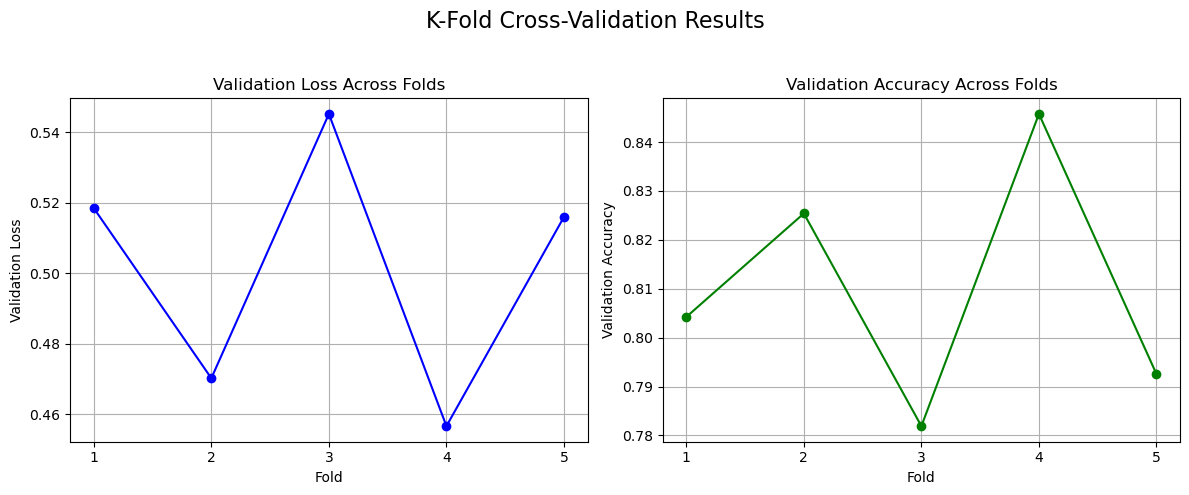

Average Validation Loss: 0.5013
Average Validation Accuracy: 0.8100


In [69]:
import matplotlib.pyplot as plt
import numpy as np

# Plot Validation Loss and Accuracy for each fold
folds = range(1, k + 1)

# Plot Validation Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(folds, fold_losses, marker='o', linestyle='-', color='b')
plt.title('Validation Loss Across Folds')
plt.xlabel('Fold')
plt.ylabel('Validation Loss')
plt.xticks(folds)
plt.grid(True)

# Plot Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(folds, fold_accuracies, marker='o', linestyle='-', color='g')
plt.title('Validation Accuracy Across Folds')
plt.xlabel('Fold')
plt.ylabel('Validation Accuracy')
plt.xticks(folds)
plt.grid(True)

# Add a super title and show the plot
plt.suptitle('K-Fold Cross-Validation Results', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print average performance
print(f"Average Validation Loss: {np.mean(fold_losses):.4f}")
print(f"Average Validation Accuracy: {np.mean(fold_accuracies):.4f}")


In [ ]:
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np

# Number of folds
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

fold_train_losses = []
fold_train_accuracies = []
fold_losses = []
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(X_pad)):
    print(f"Training on Fold {fold + 1}/{k}...")
    
    # Prepare training and validation data
    X_train, X_val = X_pad[train_idx], X_pad[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]
    structured_input_train = X_train[:, 0, :]  # Structured inputs for training
    structured_input_val = X_val[:, 0, :]      # Structured inputs for validation

    # Create a new model instance for each fold
    model = create_han_model(input_shape=(X_pad.shape[1], X_pad.shape[2]))
    
    # Train the model
    history = model.fit(
        [X_train, structured_input_train], y_train,
        validation_data=([X_val, structured_input_val], y_val),
        epochs=30,  # Use a small number of epochs for k-fold cross-validation
        batch_size=32,
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    
    # Record metrics for this fold
    train_loss, train_accuracy = model.evaluate([X_train, structured_input_train], y_train, verbose=0)
    val_loss, val_accuracy = model.evaluate([X_val, structured_input_val], y_val, verbose=0)
    
    fold_train_losses.append(train_loss)
    fold_train_accuracies.append(train_accuracy)
    fold_losses.append(val_loss)
    fold_accuracies.append(val_accuracy)

    print(f"Fold {fold + 1} - Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Fold {fold + 1} - Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

# Plot training and validation metrics
folds = range(1, k + 1)

plt.figure(figsize=(16, 8))

# Plot Training and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(folds, fold_train_losses, marker='o', linestyle='-', color='orange', label='Training Loss')
plt.plot(folds, fold_losses, marker='o', linestyle='-', color='blue', label='Validation Loss')
plt.title('Training and Validation Loss Across Folds')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.xticks(folds)
plt.legend()
plt.grid(True)

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(folds, fold_train_accuracies, marker='o', linestyle='-', color='green', label='Training Accuracy')
plt.plot(folds, fold_accuracies, marker='o', linestyle='-', color='red', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Across Folds')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.legend()
plt.grid(True)

# Add a super title and show the plot
plt.suptitle('K-Fold Cross-Validation Results: Training vs Validation', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Print average performance
print(f"Average Training Loss: {np.mean(fold_train_losses):.4f}")
print(f"Average Validation Loss: {np.mean(fold_losses):.4f}")
print(f"Average Training Accuracy: {np.mean(fold_train_accuracies):.4f}")
print(f"Average Validation Accuracy: {np.mean(fold_accuracies):.4f}")


Training on Fold 1/5...


C:\Users\nidhi\anaconda3\Lib\site-packages\keras\src\ops\nn.py:827: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


Fold 1 - Train Loss: 0.8682, Train Accuracy: 0.8114
Fold 1 - Validation Loss: 0.8847, Validation Accuracy: 0.8042
Training on Fold 2/5...
Fold 2 - Train Loss: 0.9166, Train Accuracy: 0.8061
Fold 2 - Validation Loss: 0.8894, Validation Accuracy: 0.8254
Training on Fold 3/5...
Fold 3 - Train Loss: 0.9709, Train Accuracy: 0.8170
Fold 3 - Validation Loss: 1.0222, Validation Accuracy: 0.7819
Training on Fold 4/5...
Fold 4 - Train Loss: 0.8519, Train Accuracy: 0.8011
Fold 4 - Validation Loss: 0.7900, Validation Accuracy: 0.8457
Training on Fold 5/5...


In [265]:
# Generate raw predictions for the validation set
raw_predictions = model.predict([X_val, structured_input_val])

# Print a few raw predictions to inspect
for i in range(5):  # Adjust the range as needed
    print(f"Patient {i+1} raw prediction: {raw_predictions[i]}")
# Threshold for binary classification
threshold = 0.5
murmur_present_predictions = (raw_predictions > threshold).astype(int)

# Print the binary classification outcomes
for i in range(5):  # Adjust the range as needed
    print(f"Patient {i+1} murmur present prediction: {murmur_present_predictions[i]}")
# Print original and predicted values for a few samples
for i in range(5):  # Adjust the range as needed
    print(f"Patient {i+1} original murmur: {df.iloc[i]['Murmur']}")
    print(f"Patient {i+1} predicted murmur: {'Present' if murmur_present_predictions[i][0] else 'Absent'}")
# Generate reports based on model predictions
reports = []
for i in range(len(raw_predictions)):
    patient_id = df.iloc[i]['Patient ID']  # Assuming 'Patient ID' column exists
    murmur_present = bool(murmur_present_predictions[i][0])
    
    if murmur_present:
        severity = severity_predictions[i]
        murmur_type = type_predictions[i]
        location = location_predictions[i]
        condition = map_to_condition(location, severity, murmur_type)
    else:
        severity = "N/A"
        murmur_type = "N/A"
        location = "N/A"
        condition = "None"
    
    report = generate_patient_report(
        patient_id=patient_id,
        murmur_present=murmur_present,
        severity=severity,
        murmur_type=murmur_type,
        location=location,
        condition=condition
    )
    reports.append(report)

# Print a sample report for verification
print(reports[0])


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Patient 1 raw prediction: [0.277186]
Patient 2 raw prediction: [0.277186]
Patient 3 raw prediction: [0.2056948]
Patient 4 raw prediction: [0.2056948]
Patient 5 raw prediction: [0.277186]
Patient 1 murmur present prediction: [0]
Patient 2 murmur present prediction: [0]
Patient 3 murmur present prediction: [0]
Patient 4 murmur present prediction: [0]
Patient 5 murmur present prediction: [0]
Patient 1 original murmur: Present
Patient 1 predicted murmur: Absent
Patient 2 original murmur: Present
Patient 2 predicted murmur: Absent
Patient 3 original murmur: Absent
Patient 3 predicted murmur: Absent
Patient 4 original murmur: Absent
Patient 4 predicted murmur: Absent
Patient 5 original murmur: Absent
Patient 5 predicted murmur: Absent
{'Patient ID': 13918, 'Murmur Present': False, 'Severity': 'N/A', 'Type': 'N/A', 'Most Audible Location': 'N/A', 'Associated Conditions': 'None'}


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization

def create_han_model(input_shape):
    input_layer = layers.Input(shape=input_shape)

    # Word-Level Bi-LSTM Layer with Dropout and BatchNormalization
    word_lstm = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.2))(input_layer)
    word_lstm = BatchNormalization()(word_lstm)
    
    # Word-Level Attention Layer
    word_attention = layers.Attention(use_scale=True)([word_lstm, word_lstm])
    word_attention_output = layers.GlobalAveragePooling1D()(word_attention)

    # Document-Level Bi-LSTM Layer with Dropout and BatchNormalization
    document_lstm = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout=0.2))(layers.Reshape((1, word_attention_output.shape[-1]))(word_attention_output))
    document_lstm = BatchNormalization()(document_lstm)

    # Document-Level Attention Layer
    document_attention = layers.Attention(use_scale=True)([document_lstm, document_lstm])
    document_attention_output = layers.GlobalAveragePooling1D()(document_attention)

    # Structured Data Input
    structured_input = layers.Input(shape=(X_pad.shape[-1],))

    # Combine HAN and Structured Data
    combined = layers.concatenate([document_attention_output, structured_input])
    combined_output = layers.Dense(64, activation='relu')(combined)
    combined_output = layers.Dropout(0.3)(combined_output)  # Increased Dropout
    
    # Output Layer for Binary Classification
    output = layers.Dense(1, activation='sigmoid')(combined_output)
    
    model = models.Model(inputs=[input_layer, structured_input], outputs=output)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_shape = (1, 3)  # Adjust input shape based on your embeddings
model = create_han_model(input_shape)
model.summary()

# Split the data into training and validation sets
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_pad, y, test_size=0.2, random_state=42)

# The structured input should be reshaped to match the model's expectations
structured_input_train = X_train[:, 0, :]  # Extracting the structured data component
structured_input_val = X_val[:, 0, :]  # Extracting the structured data component

# Train the model with callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

history = model.fit(
    [X_train, structured_input_train], 
    y_train, 
    epochs=50, 
    batch_size=32, 
    validation_data=([X_val, structured_input_val], y_val), 
    callbacks=[early_stopping, reduce_lr, checkpoint]
)

# Evaluate the best model
model.load_weights('best_model.keras')
loss, accuracy = model.evaluate([X_val, structured_input_val], y_val)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")


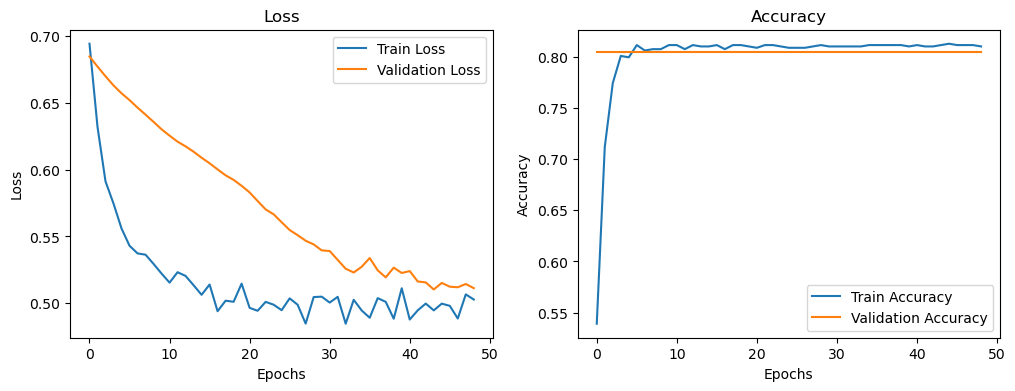

In [285]:
import matplotlib.pyplot as plt

# Plot training and validation loss and accuracy
plt.figure(figsize=(12, 4))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [337]:
# Load the best model weights
model.load_weights('best_model.keras')

# Make predictions on the validation set
predictions = model.predict([X_val, structured_input_val])

# Threshold for binary classification
threshold = 0.5
murmur_present_predictions = (predictions > threshold).astype(int)


C:\Users\nidhi\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 86 variables whereas the saved optimizer has 46 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


ValueError: A total of 19 objects could not be loaded. Example error message for object <LSTMCell name=lstm_cell, built=True>:

The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(3, 1024), Received: value.shape=(3, 512). Target variable: <Variable path=bidirectional_59/backward_lstm_71/lstm_cell/kernel, shape=(3, 1024), dtype=float32, value=[[-0.03750969 -0.04184153  0.04430444 ... -0.05281341 -0.04929484
   0.02571201]
 [-0.00703632 -0.07282057 -0.05664901 ... -0.02233257 -0.01240586
   0.04326233]
 [ 0.06653496 -0.03620837  0.01984059 ...  0.00345645  0.04699118
  -0.02978189]]>

List of objects that could not be loaded:
[<LSTMCell name=lstm_cell, built=True>, <LSTMCell name=lstm_cell, built=True>, <LayerNormalization name=layer_normalization_2, built=True>, <EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, built=True>, <EinsumDense name=value, built=True>, <LSTMCell name=lstm_cell, built=True>, <LSTMCell name=lstm_cell, built=True>, <LayerNormalization name=layer_normalization_3, built=True>, <EinsumDense name=key, built=True>, <EinsumDense name=attention_output, built=True>, <EinsumDense name=query, built=True>, <EinsumDense name=value, built=True>, <Dense name=dense_44, built=True>, <BatchNormalization name=batch_normalization_18, built=True>, <Dense name=dense_45, built=True>, <BatchNormalization name=batch_normalization_19, built=True>, <Dense name=dense_46, built=True>]

In [291]:
def generate_patient_report(patient_id, murmur_present, severity, murmur_type, location, condition):
    return {
        "Patient ID": patient_id,
        "Murmur Present": murmur_present,
        "Severity": severity,
        "Type": murmur_type,
        "Most Audible Location": location,
        "Associated Conditions": condition
    }

# Map predictions to associated conditions (example function, you might need actual logic here)
def map_to_condition(location, severity, murmur_type):
    # Example logic, replace with actual mapping
    if location == "Mitral Valve" and severity == "Grade III" and murmur_type == "Systolic":
        return "Mitral Regurgitation"
    return "Unknown Condition"

# Placeholder predictions for severity, type, and location
severity_predictions = ["Grade III" for _ in range(len(predictions))]  # Replace with actual prediction logic
type_predictions = ["Systolic" for _ in range(len(predictions))]  # Replace with actual prediction logic
location_predictions = ["Mitral Valve" for _ in range(len(predictions))]  # Replace with actual prediction logic


In [293]:
# Generate reports based on model predictions
reports = []
for i in range(len(predictions)):
    patient_id = df.iloc[i]['Patient ID']  # Assuming 'Patient ID' column exists in your dataframe
    murmur_present = bool(murmur_present_predictions[i][0])
    
    if murmur_present:
        severity = severity_predictions[i]
        murmur_type = type_predictions[i]
        location = location_predictions[i]
        condition = map_to_condition(location, severity, murmur_type)
    else:
        severity = "N/A"
        murmur_type = "N/A"
        location = "N/A"
        condition = "None"
    
    report = generate_patient_report(
        patient_id=patient_id,
        murmur_present=murmur_present,
        severity=severity,
        murmur_type=murmur_type,
        location=location,
        condition=condition
    )
    reports.append(report)

# Print a sample report for the first patient
print(reports[0])


{'Patient ID': 13918, 'Murmur Present': False, 'Severity': 'N/A', 'Type': 'N/A', 'Most Audible Location': 'N/A', 'Associated Conditions': 'None'}


In [353]:
# Check if these columns exist in the DataFrame
print(df.columns)

# Check the first few rows of the DataFrame to ensure data is present
print(df.head())


Index(['Patient ID', 'Age', 'Sex', 'Height', 'Weight', 'Pregnancy status',
       'Murmur', 'Murmur locations', 'Most audible location',
       'Systolic murmur timing', 'Systolic murmur shape',
       'Systolic murmur grading', 'Systolic murmur pitch',
       'Systolic murmur quality', 'Diastolic murmur timing',
       'Diastolic murmur shape', 'Diastolic murmur grading',
       'Diastolic murmur pitch', 'Diastolic murmur quality', 'Outcome',
       'Campaign', 'Additional ID', 'AV Sound Type', 'AV Murmur Timings',
       'PV Sound Type', 'PV Murmur Timings', 'TV Sound Type',
       'TV Murmur Timings', 'MV Sound Type', 'MV Murmur Timings'],
      dtype='object')
Empty DataFrame
Columns: [Patient ID, Age, Sex, Height, Weight, Pregnancy status, Murmur, Murmur locations, Most audible location, Systolic murmur timing, Systolic murmur shape, Systolic murmur grading, Systolic murmur pitch, Systolic murmur quality, Diastolic murmur timing, Diastolic murmur shape, Diastolic murmur grading, D